<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sound-Classification-using-temporal-augmentation-and-Mel-frequency-cepstral-coefficients" data-toc-modified-id="Sound-Classification-using-temporal-augmentation-and-Mel-frequency-cepstral-coefficients-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sound Classification using temporal augmentation and Mel frequency cepstral coefficients</a></span></li><li><span><a href="#Looking-at-the-data" data-toc-modified-id="Looking-at-the-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Looking at the data</a></span><ul class="toc-item"><li><span><a href="#Loading-Libraries" data-toc-modified-id="Loading-Libraries-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Loading Libraries</a></span></li></ul></li><li><span><a href="#Defining-some-useful-functions" data-toc-modified-id="Defining-some-useful-functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Defining some useful functions</a></span><ul class="toc-item"><li><span><a href="#Visualizing-Audio" data-toc-modified-id="Visualizing-Audio-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Visualizing Audio</a></span></li><li><span><a href="#Spectogram" data-toc-modified-id="Spectogram-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Spectogram</a></span></li></ul></li><li><span><a href="#Feature-extraction" data-toc-modified-id="Feature-extraction-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature extraction</a></span><ul class="toc-item"><li><span><a href="#Zero-Crossing-Rate" data-toc-modified-id="Zero-Crossing-Rate-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Zero Crossing Rate</a></span></li><li><span><a href="#Spectral-Centroid" data-toc-modified-id="Spectral-Centroid-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Spectral Centroid</a></span></li><li><span><a href="#Spectral-Rolloff" data-toc-modified-id="Spectral-Rolloff-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Spectral Rolloff</a></span></li><li><span><a href="#Mel-Frequency-Cepstral-Coefficients" data-toc-modified-id="Mel-Frequency-Cepstral-Coefficients-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Mel-Frequency Cepstral Coefficients</a></span></li><li><span><a href="#Chroma-Frequencies" data-toc-modified-id="Chroma-Frequencies-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Chroma Frequencies</a></span></li></ul></li><li><span><a href="#Extracting-the-features-from-the-songs" data-toc-modified-id="Extracting-the-features-from-the-songs-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Extracting the features from the songs</a></span><ul class="toc-item"><li><span><a href="#Saving-the-numpy-arrays-extracted" data-toc-modified-id="Saving-the-numpy-arrays-extracted-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Saving the numpy arrays extracted</a></span></li><li><span><a href="#label-encoder" data-toc-modified-id="label-encoder-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>label encoder</a></span></li><li><span><a href="#scaling" data-toc-modified-id="scaling-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>scaling</a></span></li></ul></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Building</a></span><ul class="toc-item"><li><span><a href="#Basic-Neural-Network" data-toc-modified-id="Basic-Neural-Network-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Basic Neural Network</a></span></li><li><span><a href="#RNN" data-toc-modified-id="RNN-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>RNN</a></span></li><li><span><a href="#LSTM" data-toc-modified-id="LSTM-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>LSTM</a></span></li><li><span><a href="#Bidirectional_LSTM" data-toc-modified-id="Bidirectional_LSTM-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Bidirectional_LSTM</a></span></li><li><span><a href="#New-LSTM" data-toc-modified-id="New-LSTM-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>New LSTM</a></span></li><li><span><a href="#Bi-Di-LSTM---NEW" data-toc-modified-id="Bi-Di-LSTM---NEW-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Bi Di LSTM - NEW</a></span></li></ul></li><li><span><a href="#Ensemble-of-Deep-Learning-models" data-toc-modified-id="Ensemble-of-Deep-Learning-models-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Ensemble of Deep Learning models</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#create-a-df-for-plotting" data-toc-modified-id="create-a-df-for-plotting-7.0.1"><span class="toc-item-num">7.0.1&nbsp;&nbsp;</span>create a df for plotting</a></span><ul class="toc-item"><li><span><a href="#Experimenting" data-toc-modified-id="Experimenting-7.0.1.1"><span class="toc-item-num">7.0.1.1&nbsp;&nbsp;</span>Experimenting</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Sound Classification using temporal augmentation and Mel frequency cepstral coefficients 


# Looking at the data

## Loading Libraries

In [1]:
# System and os level library imports
import time 
import sys
import os

# array handling library imports
import pandas as pd
import numpy as np
numpy.random.seed(42)

# Sound processing library imports
import librosa
import librosa.display as display

# plotting library imports
import matplotlib.pyplot as plt
%matplotlib inline

# play sound in jupyter notebook
import IPython.display as ipd

# save the entities for futur use
import pickle

# Model building related libraries
import sklearn
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
# Deep learning library import
import keras.backend as K
from keras.utils import np_utils
from keras.models import model_from_json
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten,BatchNormalization,Convolution2D, MaxPooling2D,Bidirectional, LSTM,SimpleRNN
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from keras.optimizers import Adam

/home/bglrgpuaccess/.local/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/lib64/python2.7/site-packages/cffi/model.py:531: UserWarning: 'point_conversion_form_t' has no values explicitly defined; guessing that it is equivalent to 'unsigned int'
  % self._get_c_name())


# Defining some useful functions

In [2]:
def saveModel(model_obj,model_file_name, weights_file_name = None):
    """Save keras model to disk."""
    if weights_file_name is None:
        weights_file_name = model_file_name
    model_json = model_obj.to_json()
    with open("new_models/{}.json".format(model_file_name), "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model_obj.save_weights("new_models/{}.h5".format(weights_file_name))
    print("Saved model {} to disk".format(model_file_name))

In [3]:
def loadModel(model_file_name, weights_file_name = None):
    """Load keras model from disk."""
    if weights_file_name is None:
        weights_file_name = model_file_name
    # load json and create model
    json_file = open('./new_models/{}.json'.format(model_file_name), 'r')
    loaded_model_json = json_file.read()
    json_file.close()
    loaded_model = model_from_json(loaded_model_json)
    # load weights into new model
    loaded_model.load_weights("./new_models/{}.h5".format(weights_file_name))
    print("Loaded model {} from disk".format(model_file_name))
    return loaded_model

In [4]:
def get_predicted_classes(model_obj, val_data, test_data= None):
    """Function to return predicted classes."""
    val_preds = model_obj.predict_classes(val_data)
    if test_data is not None:
        test_preds = model_obj.predict_classes(test_data)
        return (val_preds, test_preds)
    return val_preds

In [5]:
def get_predicted_class_prob(model_obj, val_data, test_data= None):
    """Function to return predicted class probabilities."""
    val_preds = pd.DataFrame(model_obj.predict_proba(val_data))
    if test_data is not None:
        test_preds = pd.DataFrame(model_obj.predict_proba(test_data))
        return (val_preds, test_preds)
    return val_preds

In [6]:
def recall(y_true, y_pred):
    """Recall metric.

    Only computes a batch-wise average of recall.

    Computes the recall, a metric for multi-label classification of
    how many relevant items are selected.
    """
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [7]:
def print_metrics(model_obj, train_x, train_y, test_x, test_y):
    """Function to print the model metrics."""
    print(model_obj.metrics_names)
    print(model_obj.evaluate(train_x, train_y))
    print(model_obj.evaluate(test_x, test_y))
    train_preds = model_obj.predict_classes(train_x)
    test_preds = model_obj.predict_classes(test_x)
    target_names = lb.classes_
    train_df = pd.DataFrame(classification_report(y_pred=train_preds,
                          y_true=train_y.argmax(axis=1),
                          target_names = target_names,
                         output_dict = True
                         ))
    test_df = pd.DataFrame(classification_report(y_pred=test_preds,
                          y_true=test_y.argmax(axis=1),
                          target_names = target_names,
                         output_dict = True
                         ))
    return (train_df, test_df)

In [8]:
os.getcwd()

'/nfsroot/data/home/bglrgpuaccess/BnglrMisc/Mahidhar/Music'

In [9]:
path = "/home/bglrgpuaccess/BnglrMisc/Mahidhar/Music/augmented_genres/"

In [10]:
data_info = {}
for genre in os.listdir(path):
    f =  os.listdir(path+'/'+str(genre))
    data_info[genre]=len(f)

In [11]:
data_info

{'blues': 701,
 'classical': 701,
 'country': 701,
 'disco': 701,
 'hiphop': 701,
 'jazz': 702,
 'metal': 701,
 'pop': 701,
 'reggae': 701,
 'rock': 701}

In [12]:
ipd.Audio('/home/bglrgpuaccess/BnglrMisc/Mahidhar/Music/augmented_genres/blues/blues.00000.au_original.wav') # load a local WAV file

In [13]:
d,sr = librosa.load('/home/bglrgpuaccess/BnglrMisc/Mahidhar/Music/augmented_genres/blues/blues.00000.au_original.wav') # load a local WAV file

## Visualizing Audio


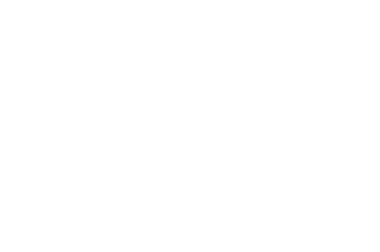

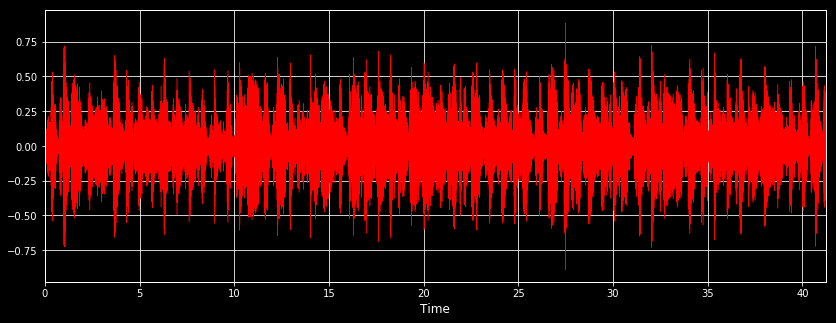

In [14]:
plt.axis('off')
plt.style.use('ggplot')
plt.style.use(['dark_background'])
plt.figure(figsize=(14, 5),)

librosa.display.waveplot(d, sr=sr,color='r',)

X - time 
y - amplitude

## Spectogram

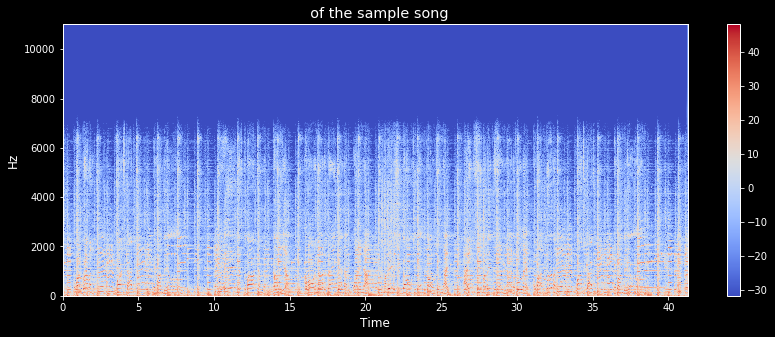

In [15]:
X = librosa.stft(d)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.title("  of the sample song")
plt.colorbar()
plt.show()

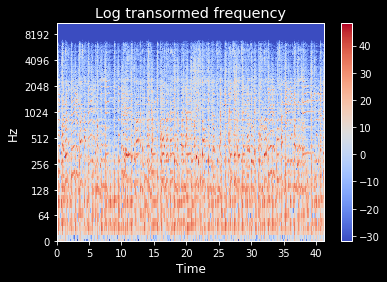

In [16]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.title("Log transormed frequency")
plt.colorbar()
plt.show()

# Feature extraction

## Zero Crossing Rate

> The zero crossing rate is the rate of sign-changes along a signal, i.e., the rate at which the signal changes from positive to negative or back. 

In [17]:
np.sum(librosa.feature.zero_crossing_rate(d))

109.70263671875

##  Spectral Centroid


> It indicates where the __centre of mass__ for a sound is located and is calculated as the weighted mean of the frequencies present in the sound.

> Consider two songs, one from a blues genre and the other belonging to metal. Now as compared to the blues genre song which is the same throughout its length, the metal song has more frequencies towards the end. So spectral centroid for blues song will lie somewhere near the middle of its spectrum while that for a metal song would be towards its end.

In [18]:
# Normalising the spectral centroid for visualisation
def normalize(d, axis=0):
    """This function will scale the features along the time axis by default."""
    return sklearn.preprocessing.minmax_scale(d, axis=axis)

In [19]:
def plot_spectral_centroid(d,genre):
    """Function to plot the spectral centroid."""
    spectral_centroids = librosa.feature.spectral_centroid(d, sr=sr)[0]
    # Computing the time variable for visualization
    frames = range(len(spectral_centroids))
    t = librosa.frames_to_time(frames)
    #Plotting the Spectral Centroid along the waveform
    fig, ax = plt.subplots( nrows=1, ncols=1 )
    librosa.display.waveplot(d, sr=sr, alpha=0.4)
    plt.plot(t, normalize(spectral_centroids), color='r')
    plt.title("Spectral Centroid of a {} song".format(genre))
    plt.axhline(y=0.5, color='black', linestyle='--')
    fig.set_size_inches(9.25, 4.5)
    fig.savefig('img/{}_spectral_centroid.png'.format(genre))
    plt.show()

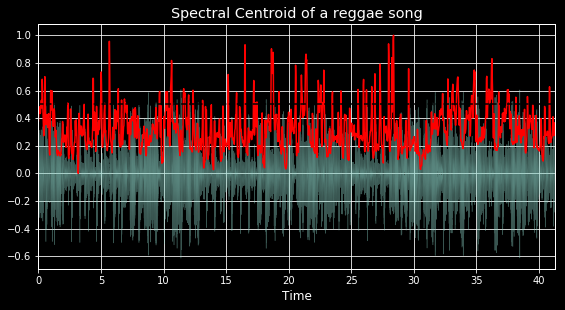

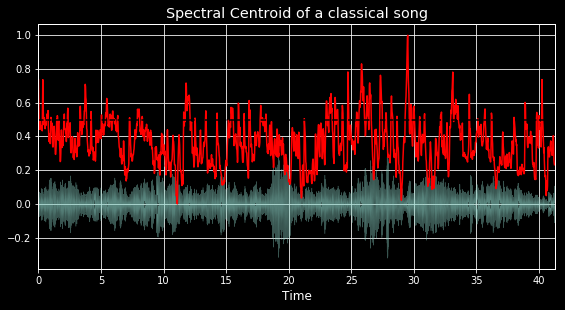

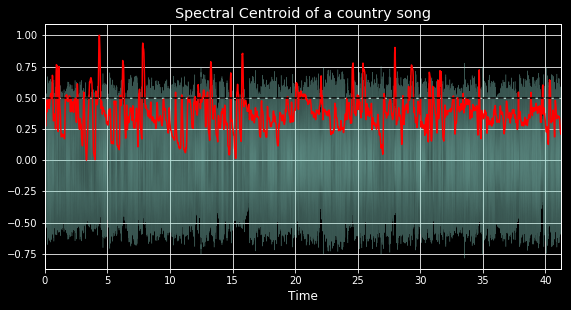

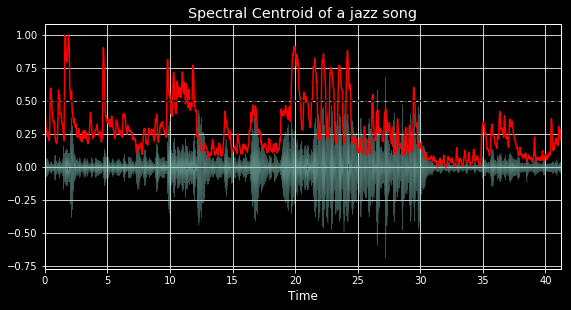

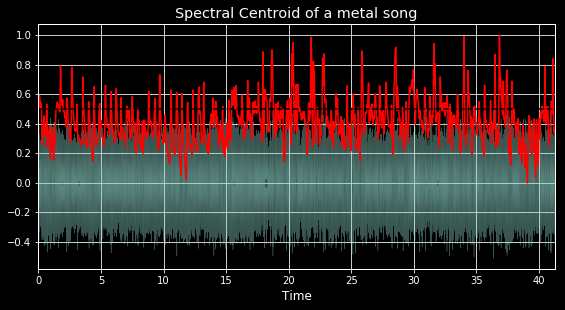

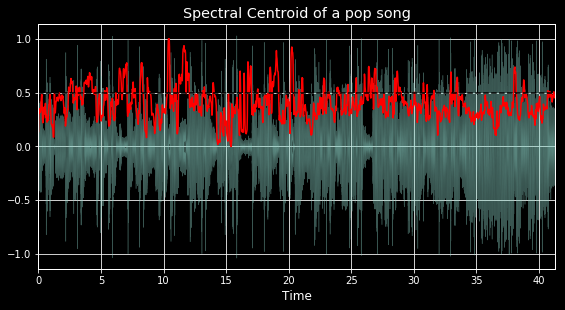

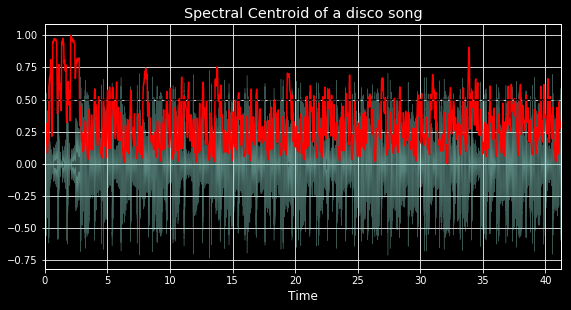

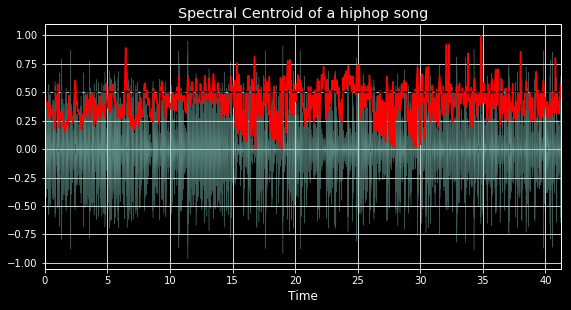

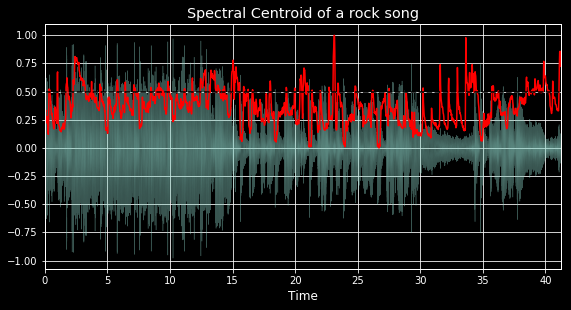

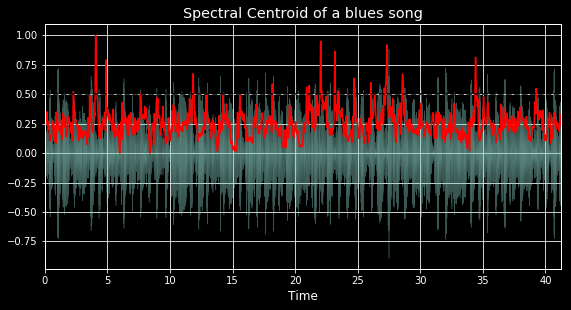

In [20]:
for k in data_info.keys():
    data_path = '/home/bglrgpuaccess/BnglrMisc/Mahidhar/Music/augmented_genres/{}/{}.00000.au_original.wav'.format(k,k)
    d,sr = librosa.load(data_path)
    plot_spectral_centroid(d,k)

## Spectral Rolloff

> It is a measure of the shape of the signal. It represents the frequency below which a specified percentage of the total spectral energy, e.g. 85%, lies.

In [21]:
def plot_spectral_rolloff(d,genre):
    """Function to plot the spectral roll off."""
    #Plotting the Spectral Rolloff along the waveform
    fig, ax = plt.subplots( nrows=1, ncols=1 )
    spectral_rolloff = librosa.feature.spectral_rolloff(d+0.01, sr=sr)[0]
    librosa.display.waveplot(d, sr=sr, alpha=0.4)
    frames = range(len(spectral_rolloff))
    t = librosa.frames_to_time(frames)
    plt.plot(t, normalize(spectral_rolloff), color='r')
    plt.title("Spectral Rolloff of a {} song".format(genre))
    plt.axhline(y=0.5, color='black', linestyle='--')
    fig.set_size_inches(9.25, 4.5)
    fig.savefig('img/{}_spectral_rolloff.png'.format(genre))
    plt.show()

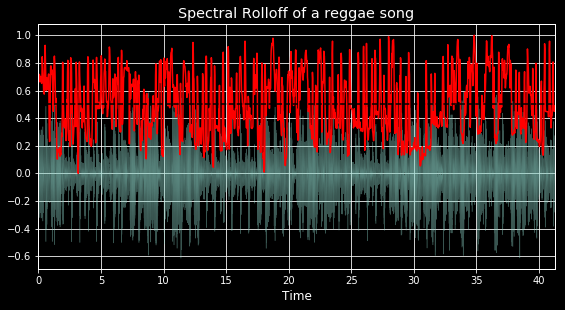

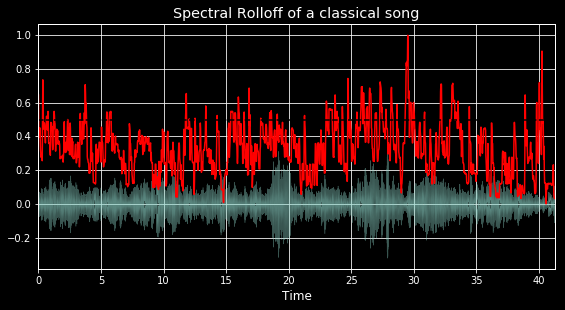

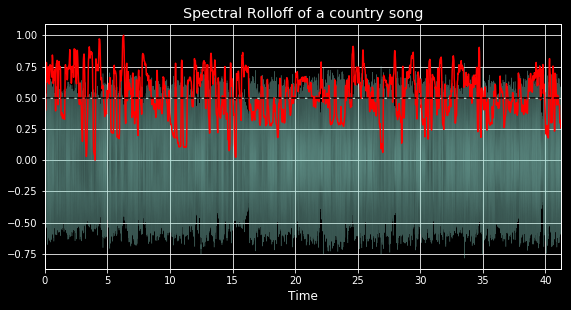

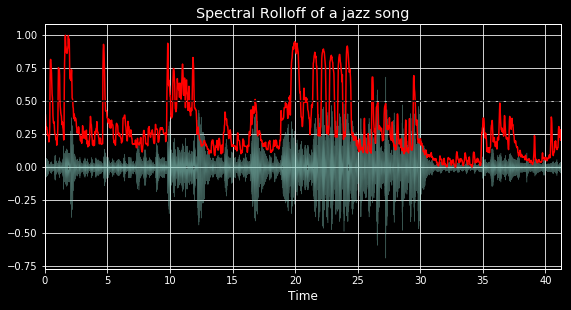

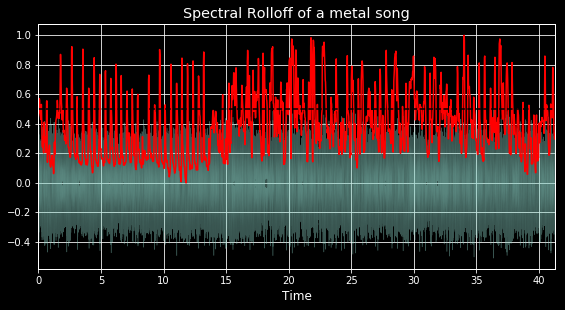

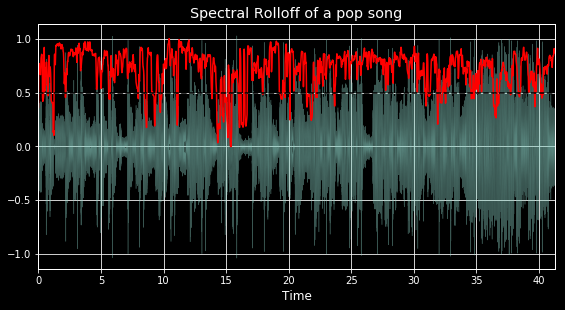

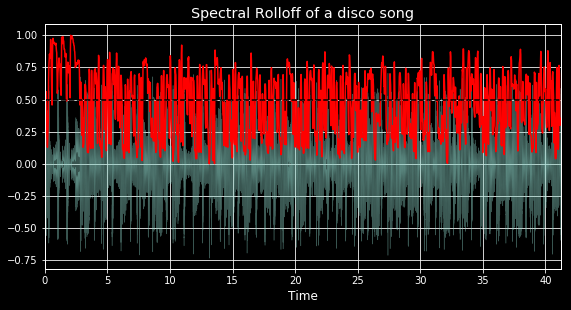

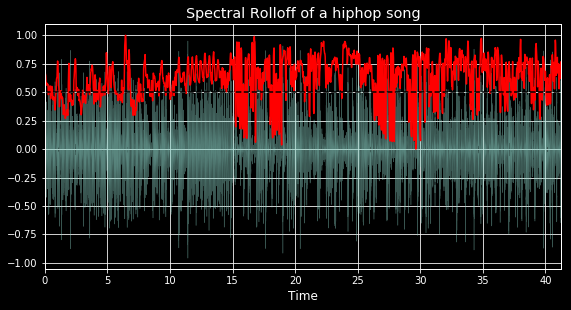

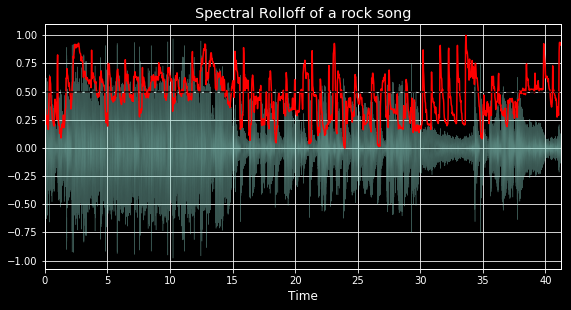

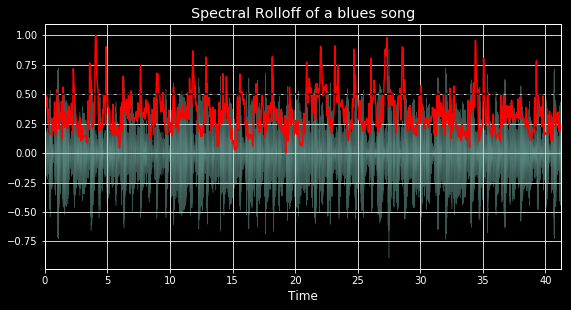

In [22]:
for k in data_info.keys():
    data_path = '/home/bglrgpuaccess/BnglrMisc/Mahidhar/Music/augmented_genres/{}/{}.00000.au_original.wav'.format(k,k)
    d,sr = librosa.load(data_path)
    plot_spectral_rolloff(d,k)

## Mel-Frequency Cepstral Coefficients


> The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.

In [23]:
def plot_mfcc(d,genre):
    """Function to plot the mfcc."""
    fig, ax = plt.subplots( nrows=1, ncols=1 )
    mfccs = librosa.feature.mfcc(d)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    fig.savefig('img/{}_mfcc.png'.format(genre))
    plt.show()
    return mfccs

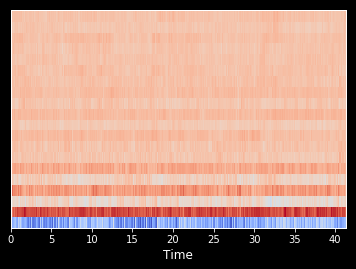

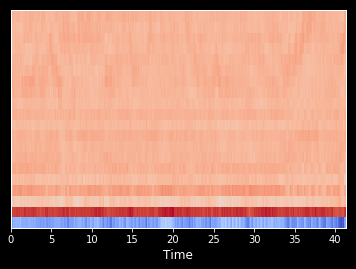

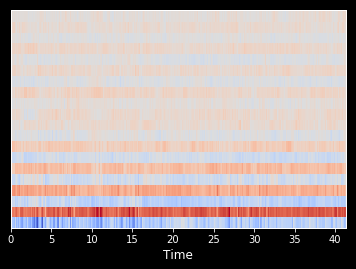

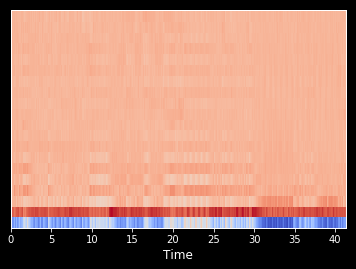

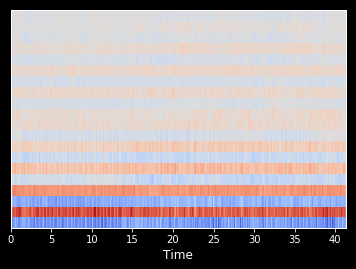

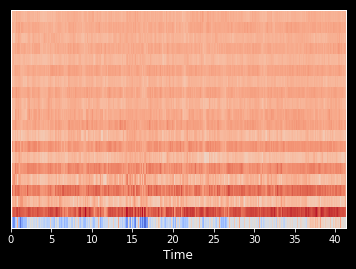

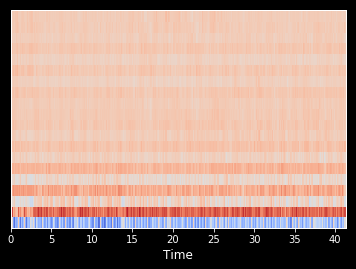

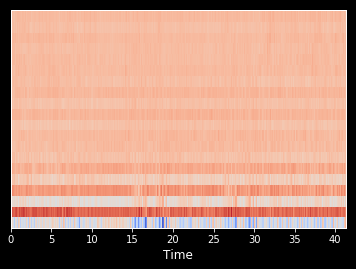

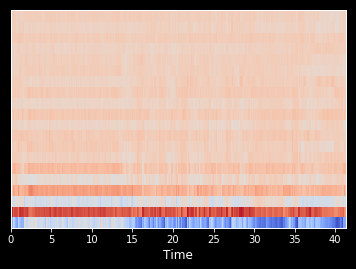

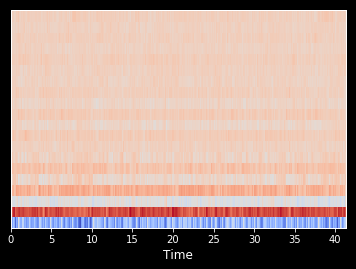

In [24]:
for k in data_info.keys():
    data_path = '/home/bglrgpuaccess/BnglrMisc/Mahidhar/Music/augmented_genres/{}/{}.00000.au_original.wav'.format(k,k)
    d,sr = librosa.load(data_path)
    mfccs = plot_mfcc(d,k)

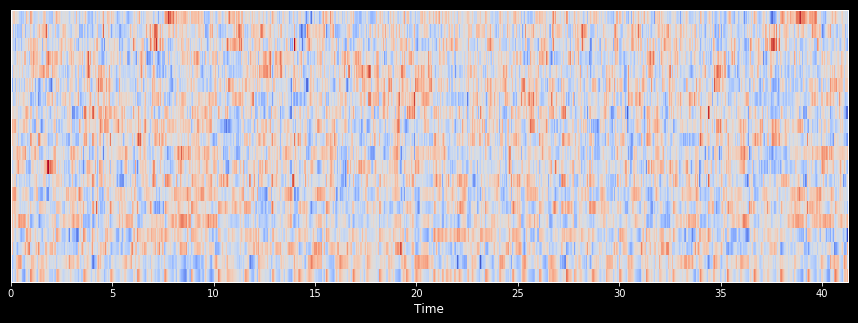

In [25]:
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

## Chroma Frequencies


> Chroma features are an interesting and powerful representation for music audio in which the entire spectrum is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the musical octave.

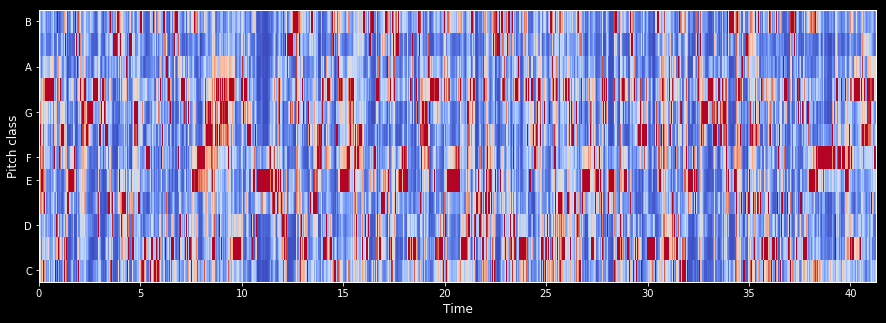

In [26]:
hop_length = 512
chromagram = librosa.feature.chroma_stft(d, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')

In [27]:
def extract_features(y,sr):
    """This function extracts the features from songs, 
    We are extracting the Chroma features, spectral centroid, spectral bandwidth, spectral roll off, zero crossing rate and the mfccc's"""
    chroma_freq = librosa.feature.chroma_stft(y=y, sr=sr)
    specral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr,n_mfcc=39).T,axis = 0)
    chroma_freq_arr = np.mean(np.ndarray.flatten(chroma_freq))
    spectral_centroid_arr = np.mean(np.ndarray.flatten(specral_centroid))
    spectral_bandwidth_arr = np.mean(np.ndarray.flatten(spectral_bandwidth))
    spectral_rolloff_arr = np.mean(np.ndarray.flatten(spectral_rolloff))
    zero_crossing_rate_arr = np.mean(np.ndarray.flatten(zero_crossing_rate))
    mfcc_arr = np.ndarray.flatten(mfcc)
    temp = np.array([chroma_freq_arr,spectral_centroid_arr,spectral_bandwidth_arr,spectral_rolloff_arr,zero_crossing_rate_arr])
    all_features =  np.concatenate([temp,mfcc_arr])
    return all_features

In [28]:
def loadAudioDataExtractFeatures(file_ID,genre, file_format = 'wav'):
    """Load song and extract the features using the extract_features function"""
    data_path = '/home/bglrgpuaccess/BnglrMisc/Mahidhar/Music/augmented_genres/{}/{}.wav'.format(genre,file_ID)
    y,sr = librosa.load(data_path)
    features = extract_features(y,sr)
    return features

# Extracting the features from the songs

In [30]:
# X = []
# y= []
# for genre in os.listdir(path):
#     print("genre",genre)
#     path_genre = path+'/'+str(genre)
#     for i in os.listdir(path_genre):
#         if i.endswith('wav'): 
#             file_ID = i.strip('.wav') #file format already provided
#             X.append(loadAudioDataExtractFeatures(genre= genre,file_ID=file_ID))
#             y.append(genre)
#     print("genre ended",genre)

## Saving the numpy arrays extracted

In [31]:
# np.save('X_train_many_features.npy', np.array(X))
X = np.load('X_train_many_features.npy')

In [32]:
# np.save('y_train_many_features.npy', np.array(y))
y = np.load('y_train_many_features.npy')

## label encoder

In [33]:
X = np.array(X)
y = np.array(y)

lb = LabelEncoder()

y = to_categorical(lb.fit_transform(y))

In [34]:
pickle.dump(lb, open("label_encoder.pkl","wb"), protocol=pickle.HIGHEST_PROTOCOL)

In [35]:
num_labels = y.shape[1]

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 124)

## scaling

In [37]:
scaler = StandardScaler()
scaler.fit(np.array(x_train[:, :-1], dtype = float))
x_train= scaler.transform(np.array(x_train[:, :-1], dtype = float))
x_test = scaler.transform(np.array(x_test[:, :-1], dtype = float))

In [38]:
pickle.dump(scaler, open("scaler.pkl","wb"), protocol=pickle.HIGHEST_PROTOCOL)

In [39]:
# with open('scaler.pkl', 'rb') as pickle_file:
#     tep = pickle.load(pickle_file)

In [40]:
scaler.mean_

array([ 4.44932447e-01,  1.98883668e+03,  1.86400916e+03,  4.10105598e+03,
        1.22008101e-01, -2.08531678e+02,  1.17085010e+02, -3.49108502e+01,
        5.53811233e+01, -1.81386979e+01,  3.27661516e+01, -1.35187139e+01,
        1.56882896e+01, -2.96360469e+00,  2.36319041e+00,  4.59905077e+00,
       -3.80646642e+00,  7.22543597e+00, -6.18049154e+00,  7.37023859e+00,
       -6.65921546e+00,  5.27115960e+00, -3.48929561e+00,  1.93513867e+00,
       -1.64674625e+00, -9.14070832e-01,  1.34627576e+00, -3.18669983e+00,
        2.79304783e+00, -3.89585254e+00,  2.88975766e+00, -4.06776351e+00,
        1.86836870e+00, -2.20212821e+00,  3.32505737e-01, -4.75414669e-01,
       -1.61384943e+00,  1.03890302e+00, -2.78576010e+00,  1.73495142e+00,
       -2.89650449e+00,  1.68726187e+00, -2.19240207e+00,  4.66908693e-01])

# Model Building

## Basic Neural Network

In [41]:
model_name = 'Basic_NN'
tb = TensorBoard(log_dir='./log/{}'.format(model_name), histogram_freq=0,  
          write_graph=True, write_images=True)
callbacks = [EarlyStopping(monitor='val_loss', min_delta= 0.005, patience=50),
            EarlyStopping(monitor='val_acc', min_delta= 0.005, patience=50),
            EarlyStopping(monitor='val_recall', min_delta= 0.005, patience=50),tb]

model_basic_nn = Sequential()
input_shape = x_train.shape[1]
num_labels = 10
model_basic_nn.add(Dense(256, input_shape=(input_shape,)))
model_basic_nn.add(Activation('relu'))
model_basic_nn.add(Dense(128))
model_basic_nn.add(Activation('relu'))
model_basic_nn.add(Dense(num_labels))
model_basic_nn.add(Activation('softmax'))

model_basic_nn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc',recall])

In [42]:
model_basic_nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               11520     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 45,706
Trainable params: 45,706
Non-trainable params: 0
_________________________________________________________________


In [43]:
%time model_basic_nn.fit(x_train, y_train, callbacks = callbacks,epochs=15000, validation_split=0.25)

Train on 4206 samples, validate on 1402 samples
Epoch 1/15000
4206/4206 [==============================] - 2s 462us/step - loss: 1.4000 - acc: 0.5311 - recall: 0.2608 - val_loss: 1.0650 - val_acc: 0.6484 - val_recall: 0.4394
Epoch 2/15000
4206/4206 [==============================] - 0s 101us/step - loss: 0.8284 - acc: 0.7323 - recall: 0.5599 - val_loss: 0.8239 - val_acc: 0.7304 - val_recall: 0.5785
Epoch 3/15000
4206/4206 [==============================] - 0s 100us/step - loss: 0.6119 - acc: 0.8084 - recall: 0.6933 - val_loss: 0.6647 - val_acc: 0.7882 - val_recall: 0.6876
Epoch 4/15000
4206/4206 [==============================] - 0s 117us/step - loss: 0.4752 - acc: 0.8590 - recall: 0.7784 - val_loss: 0.5709 - val_acc: 0.8195 - val_recall: 0.7368
Epoch 5/15000
4206/4206 [==============================] - 1s 123us/step - loss: 0.3633 - acc: 0.9025 - recall: 0.8433 - val_loss: 0.4706 - val_acc: 0.8524 - val_recall: 0.7903
Epoch 6/15000
4206/4206 [==============================] - 0s 110us

Epoch 47/15000
4206/4206 [==============================] - 0s 113us/step - loss: 0.0029 - acc: 0.9995 - recall: 0.9995 - val_loss: 0.0846 - val_acc: 0.9779 - val_recall: 0.9772
Epoch 48/15000
4206/4206 [==============================] - 0s 100us/step - loss: 0.0031 - acc: 0.9995 - recall: 0.9995 - val_loss: 0.0855 - val_acc: 0.9786 - val_recall: 0.9772
Epoch 49/15000
4206/4206 [==============================] - 0s 91us/step - loss: 0.0060 - acc: 0.9986 - recall: 0.9986 - val_loss: 0.0958 - val_acc: 0.9750 - val_recall: 0.9750
Epoch 50/15000
4206/4206 [==============================] - 0s 92us/step - loss: 0.0033 - acc: 0.9990 - recall: 0.9990 - val_loss: 0.0972 - val_acc: 0.9743 - val_recall: 0.9729
Epoch 51/15000
4206/4206 [==============================] - 0s 97us/step - loss: 0.0058 - acc: 0.9986 - recall: 0.9986 - val_loss: 0.0816 - val_acc: 0.9772 - val_recall: 0.9772
CPU times: user 42.7 s, sys: 6.67 s, total: 49.3 s
Wall time: 32.4 s


In [44]:
model_basic_nn.metrics_names

['loss', 'acc', 'recall']

In [45]:
model_basic_nn.evaluate(x_train, y_train)

5608/5608 [==============================] - 0s 33us/step


[0.022019960386605506, 0.9939372325249644, 0.9939372325249644]

In [46]:
train_preds_basic_nn = model_basic_nn.predict_classes(x_train)
test_preds_basic_nn = model_basic_nn.predict_classes(x_test)

In [47]:
train_preds_basic_nn_proba,test_preds_basic_nn_proba = get_predicted_class_prob(model_basic_nn,x_train, x_test)
train_preds_basic_nn,test_preds_basic_nn = get_predicted_classes(model_basic_nn,x_train, x_test)

In [48]:
saveModel(model_basic_nn,"model_basic_nn")

Saved model model_basic_nn to disk


In [49]:
model_basic_nn = loadModel('model_basic_nn')

Loaded model model_basic_nn from disk


In [50]:
model_basic_nn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc',recall])

In [51]:
x_train[0]

array([-1.98896239, -1.27421061, -0.55899042, -1.20583012, -1.17169541,
        0.01550273,  0.72142471,  0.79821175,  0.4354028 ,  0.74100518,
       -1.25599166, -0.71875966, -0.09077415, -1.87667268, -0.63167897,
       -1.0948513 , -1.78806273, -0.78063185, -0.37952927, -0.48799131,
       -0.86232644, -0.15337243, -1.0548783 , -0.00225718, -0.57859402,
       -1.41891559, -0.62721687, -0.52262825, -0.02158828, -0.0369075 ,
        0.94060381, -0.11293259, -0.21549473, -0.25227307, -0.19368065,
       -0.15143519, -0.6603911 , -0.21951001, -0.17598373,  0.82966974,
        0.92106679,  1.53669327,  1.07747686,  0.32755302])

In [52]:
model_basic_nn_df,model_basic_nn_df_test = print_metrics(model_basic_nn,x_train,y_train, x_test, y_test)

['loss', 'acc', 'recall']
5608/5608 [==============================] - 0s 57us/step
[0.022019960386605506, 0.9939372325249644, 0.9939372325249644]
1402/1402 [==============================] - 0s 34us/step
[0.0940492769195758, 0.9778887303851641, 0.9771754636233951]


In [53]:
model_basic_nn_df

blues   classical     country       disco      hiphop  \
f1-score     0.99639    0.994633    0.997425    0.994755    0.994746   
precision    0.99639    0.996416    0.994863    0.996497    0.991274   
recall       0.99639    0.992857    1.000000    0.993019    0.998243   
support    554.00000  560.000000  581.000000  573.000000  569.000000   

                 jazz    macro avg       metal    micro avg         pop  \
f1-score     0.991055     0.993912    0.988909     0.993937    0.998208   
precision    0.992832     0.993924    0.988909     0.993937    0.998208   
recall       0.989286     0.993905    0.988909     0.993937    0.998208   
support    560.000000  5608.000000  541.000000  5608.000000  558.000000   

               reggae        rock  weighted avg  
f1-score     0.997280    0.985714      0.993934  
precision    0.996377    0.987478      0.993937  
recall       0.998185    0.983957      0.993937  
support    551.000000  561.000000   5608.000000

In [54]:
model_basic_nn_df_test

blues   classical     country       disco      hiphop  \
f1-score     0.989831    0.989247    0.975207    0.968504    0.970149   
precision    0.986486    1.000000    0.967213    0.976190    0.955882   
recall       0.993197    0.978723    0.983333    0.960938    0.984848   
support    147.000000  141.000000  120.000000  128.000000  132.000000   

                 jazz    macro avg       metal    micro avg         pop  \
f1-score     0.978723     0.977543    0.981132     0.977889    0.993007   
precision    0.978723     0.977462    0.987342     0.977889    0.993007   
recall       0.978723     0.977729    0.975000     0.977889    0.993007   
support    141.000000  1402.000000  160.000000  1402.000000  143.000000   

               reggae        rock  weighted avg  
f1-score     0.983389    0.946237      0.977892  
precision    0.980132    0.949640      0.977997  
recall       0.986667    0.942857      0.977889  
support    150.000000  140.000000   1402.000000

In [55]:
model_basic_nn_df.to_csv("model_basic_nn_df.csv",index=True)

In [56]:
model_basic_nn_df_test.to_csv("model_basic_nn_df_test.csv",index=True)

## NN with regularization

In [57]:
model_name = 'Regularized_NN'
tb = TensorBoard(log_dir='./log/{}'.format(model_name), histogram_freq=0,  
          write_graph=True, write_images=True)
callbacks = [EarlyStopping(monitor='val_loss', min_delta= 0.005, patience=50),
            EarlyStopping(monitor='val_acc', min_delta= 0.005, patience=50),
            EarlyStopping(monitor='val_recall', min_delta= 0.005, patience=50),tb]

model_regr_nn = Sequential()
input_shape = x_train.shape[1]
num_labels = 10
model_regr_nn.add(Dense(256, input_shape=(input_shape,)))
model_regr_nn.add(Activation('relu'))
model_regr_nn.add(Dense(128))
model_regr_nn.add(Activation('relu'))
model_regr_nn.add(Dropout(0.5))
model_regr_nn.add(Dense(num_labels))
model_regr_nn.add(Activation('softmax'))

model_regr_nn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc',recall])

In [58]:
model_regr_nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               11520     
_________________________________________________________________
activation_4 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_5 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_6 (Activation)    (None, 10)                0         
Total para

In [59]:
%time model_regr_nn.fit(x_train, y_train, callbacks = callbacks,epochs=15000, validation_split=0.25)

Train on 4206 samples, validate on 1402 samples
Epoch 1/15000
4206/4206 [==============================] - 1s 169us/step - loss: 1.7520 - acc: 0.3923 - recall: 0.1317 - val_loss: 1.2997 - val_acc: 0.5685 - val_recall: 0.2789
Epoch 2/15000
4206/4206 [==============================] - 1s 128us/step - loss: 1.1845 - acc: 0.6006 - recall: 0.3614 - val_loss: 1.0153 - val_acc: 0.6648 - val_recall: 0.4322
Epoch 3/15000
4206/4206 [==============================] - 0s 112us/step - loss: 0.9643 - acc: 0.6707 - recall: 0.4945 - val_loss: 0.8639 - val_acc: 0.7204 - val_recall: 0.5378
Epoch 4/15000
4206/4206 [==============================] - 0s 99us/step - loss: 0.7933 - acc: 0.7361 - recall: 0.5908 - val_loss: 0.7548 - val_acc: 0.7575 - val_recall: 0.6248
Epoch 5/15000
4206/4206 [==============================] - 0s 102us/step - loss: 0.6762 - acc: 0.7798 - recall: 0.6652 - val_loss: 0.6414 - val_acc: 0.7917 - val_recall: 0.6833
Epoch 6/15000
4206/4206 [==============================] - 0s 108us/

Epoch 47/15000
4206/4206 [==============================] - 0s 111us/step - loss: 0.0312 - acc: 0.9914 - recall: 0.9905 - val_loss: 0.0939 - val_acc: 0.9672 - val_recall: 0.9650
Epoch 48/15000
4206/4206 [==============================] - 0s 104us/step - loss: 0.0240 - acc: 0.9948 - recall: 0.9943 - val_loss: 0.0670 - val_acc: 0.9750 - val_recall: 0.9743
Epoch 49/15000
4206/4206 [==============================] - 0s 108us/step - loss: 0.0275 - acc: 0.9941 - recall: 0.9933 - val_loss: 0.0816 - val_acc: 0.9743 - val_recall: 0.9722
Epoch 50/15000
4206/4206 [==============================] - 1s 130us/step - loss: 0.0295 - acc: 0.9910 - recall: 0.9898 - val_loss: 0.0634 - val_acc: 0.9765 - val_recall: 0.9750
Epoch 51/15000
4206/4206 [==============================] - 0s 111us/step - loss: 0.0343 - acc: 0.9886 - recall: 0.9876 - val_loss: 0.0749 - val_acc: 0.9722 - val_recall: 0.9715
CPU times: user 43.8 s, sys: 5.22 s, total: 49 s
Wall time: 25.9 s


## RNN

In [60]:
x_rnn_train  = x_train.reshape(x_train.shape[0], 1, x_train.shape[1])
x_rnn_test  = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])

In [61]:
x_rnn_train.shape

(5608, 1, 44)

In [62]:
model_name = 'Basic_RNN'
tb = TensorBoard(log_dir='./log/{}'.format(model_name), histogram_freq=0,  
          write_graph=True, write_images=True)
callbacks = [EarlyStopping(monitor='val_loss', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_acc', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_recall', min_delta= 0.005, patience=20),tb]

model_basic_rnn = Sequential()
model_basic_rnn.add(SimpleRNN(256 , input_shape=(x_rnn_train.shape[1], x_rnn_train.shape[2])))
model_basic_rnn.add(Dense(256))
model_basic_rnn.add(Activation('relu'))
model_basic_rnn.add(Dropout(0.5))

model_basic_rnn.add(Dense(256))
model_basic_rnn.add(Activation('relu'))
model_basic_rnn.add(Dropout(0.5))

model_basic_rnn.add(Dense(num_labels))
model_basic_rnn.add(Activation('softmax'))

model_basic_rnn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc',recall])

In [63]:
model_basic_rnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 256)               77056     
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
__________

In [64]:
%time model_basic_rnn.fit(x_rnn_train, y_train, callbacks = callbacks,epochs=15000, validation_split=0.25)

Train on 4206 samples, validate on 1402 samples
Epoch 1/15000
4206/4206 [==============================] - 1s 307us/step - loss: 1.6920 - acc: 0.3961 - recall: 0.1774 - val_loss: 1.2346 - val_acc: 0.5642 - val_recall: 0.3431
Epoch 2/15000
4206/4206 [==============================] - 1s 212us/step - loss: 1.2011 - acc: 0.5747 - recall: 0.3954 - val_loss: 0.9530 - val_acc: 0.6812 - val_recall: 0.4993
Epoch 3/15000
4206/4206 [==============================] - 1s 196us/step - loss: 1.0143 - acc: 0.6498 - recall: 0.5078 - val_loss: 0.8524 - val_acc: 0.7183 - val_recall: 0.5685
Epoch 4/15000
4206/4206 [==============================] - 1s 216us/step - loss: 0.8824 - acc: 0.6904 - recall: 0.5744 - val_loss: 0.7186 - val_acc: 0.7639 - val_recall: 0.6555
Epoch 5/15000
4206/4206 [==============================] - 1s 206us/step - loss: 0.8143 - acc: 0.7247 - recall: 0.6189 - val_loss: 0.6445 - val_acc: 0.8003 - val_recall: 0.6904
Epoch 6/15000
4206/4206 [==============================] - 1s 214us

In [65]:
train_preds_basic_rnn_proba,test_preds_basic_rnn_proba = get_predicted_class_prob(model_basic_rnn,x_rnn_train, x_rnn_test)
train_preds_basic_rnn,test_preds_basic_rnn = get_predicted_classes(model_basic_rnn,x_rnn_train, x_rnn_test)

In [66]:
model_basic_rnn_df,model_basic_rnn_df_test = print_metrics(model_basic_rnn,x_rnn_train,y_train,x_rnn_test,y_test )

['loss', 'acc', 'recall']
5608/5608 [==============================] - 0s 67us/step
[0.0964527858577977, 0.9741440798858774, 0.9638017118402282]
1402/1402 [==============================] - 0s 70us/step
[0.16319349640913935, 0.9557774607703281, 0.9372325249643366]


In [67]:
model_basic_rnn_df

blues   classical     country       disco      hiphop  \
f1-score     0.990063    0.977935    0.973482    0.973067    0.973592   
precision    0.990958    0.966841    0.967687    0.968858    0.975309   
recall       0.989170    0.989286    0.979346    0.977312    0.971880   
support    554.000000  560.000000  581.000000  573.000000  569.000000   

                 jazz    macro avg       metal    micro avg         pop  \
f1-score     0.965147     0.974167    0.979779     0.974144    0.978995   
precision    0.966011     0.974344    0.974406     0.974144    0.998138   
recall       0.964286     0.974188    0.985213     0.974144    0.960573   
support    560.000000  5608.000000  541.000000  5608.000000  558.000000   

               reggae        rock  weighted avg  
f1-score     0.970404    0.959202      0.974126  
precision    0.959220    0.976015      0.974306  
recall       0.981851    0.942959      0.974144  
support    551.000000  561.000000   5608.000000

In [68]:
model_basic_rnn_df_test

blues   classical     country       disco      hiphop  \
f1-score     0.972789    0.975439    0.924901    0.964981    0.924812   
precision    0.972789    0.965278    0.879699    0.961240    0.917910   
recall       0.972789    0.985816    0.975000    0.968750    0.931818   
support    147.000000  141.000000  120.000000  128.000000  132.000000   

                 jazz    macro avg       metal    micro avg         pop  \
f1-score     0.960854     0.955062    0.977778     0.955777    0.967509   
precision    0.964286     0.954948    0.993548     0.955777    1.000000   
recall       0.957447     0.955975    0.962500     0.955777    0.937063   
support    141.000000  1402.000000  160.000000  1402.000000  143.000000   

               reggae        rock  weighted avg  
f1-score     0.946309    0.935252      0.955976  
precision    0.952703    0.942029      0.956913  
recall       0.940000    0.928571      0.955777  
support    150.000000  140.000000   1402.000000

In [69]:
saveModel(model_basic_rnn,"model_basic_RNN")

Saved model model_basic_RNN to disk


In [70]:
model_basic_rnn_df.to_csv("model_basic_rnn_df.csv")

In [71]:
model_basic_rnn_df_test.to_csv("model_basic_rnn_df_test.csv")

## LSTM

In [72]:
model_name = 'Basic_LSTM'
tb = TensorBoard(log_dir='./log/{}'.format(model_name), histogram_freq=0,  
          write_graph=True, write_images=True)
callbacks = [EarlyStopping(monitor='val_loss', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_acc', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_recall', min_delta= 0.005, patience=20),tb]



model_lstm = Sequential()
model_lstm.add(LSTM(256 , input_shape=(x_rnn_train.shape[1], x_rnn_train.shape[2])))
model_lstm.add(BatchNormalization())
model_lstm.add(Dense(256))
model_lstm.add(Activation('relu'))
model_lstm.add(Dropout(0.5))

model_lstm.add(Dense(256))
model_lstm.add(Activation('relu'))
model_lstm.add(Dropout(0.5))

model_lstm.add(Dense(256))
model_lstm.add(Activation('relu'))
model_lstm.add(Dropout(0.5))

model_lstm.add(Dense(num_labels))
model_lstm.add(Activation('softmax'))

model_lstm.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc',recall])

In [73]:
model_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 256)               308224    
_________________________________________________________________
batch_normalization_1 (Batch (None, 256)               1024      
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_10 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_11 (Activation)   (None, 256)               0         
__________

In [74]:
%time model_lstm.fit(x_rnn_train, y_train, callbacks = callbacks,epochs=15000, validation_split=0.25)

Train on 4206 samples, validate on 1402 samples
Epoch 1/15000
4206/4206 [==============================] - 3s 626us/step - loss: 2.0409 - acc: 0.2732 - recall: 0.1079 - val_loss: 1.4581 - val_acc: 0.4765 - val_recall: 0.2589
Epoch 2/15000
4206/4206 [==============================] - 1s 353us/step - loss: 1.5541 - acc: 0.4446 - recall: 0.2680 - val_loss: 1.2327 - val_acc: 0.5699 - val_recall: 0.3295
Epoch 3/15000
4206/4206 [==============================] - 2s 363us/step - loss: 1.3248 - acc: 0.5369 - recall: 0.3602 - val_loss: 1.0463 - val_acc: 0.6519 - val_recall: 0.4344
Epoch 4/15000
4206/4206 [==============================] - 2s 361us/step - loss: 1.2001 - acc: 0.5796 - recall: 0.4291 - val_loss: 0.9264 - val_acc: 0.6961 - val_recall: 0.5185
Epoch 5/15000
4206/4206 [==============================] - 1s 354us/step - loss: 1.1120 - acc: 0.6239 - recall: 0.4796 - val_loss: 0.8554 - val_acc: 0.7368 - val_recall: 0.5456
Epoch 6/15000
4206/4206 [==============================] - 2s 368us

In [75]:
train_preds_basic_lstm_proba,test_preds_basic_lstm_proba = get_predicted_class_prob(model_lstm,x_rnn_train, x_rnn_test)
train_preds_basic_lstm,test_preds_basic_lstm = get_predicted_classes(model_lstm,x_rnn_train, x_rnn_test)

In [76]:
model_lstm_df,model_lstm_df_test = print_metrics(model_lstm,x_rnn_train,y_train, x_rnn_test, y_test)

['loss', 'acc', 'recall']
5608/5608 [==============================] - 1s 95us/step
[0.13756691942924099, 0.9609486447931527, 0.9358059914407989]
1402/1402 [==============================] - 0s 84us/step
[0.2239626818595616, 0.9372325249643366, 0.8972895863052782]


In [77]:
model_lstm_df

blues   classical     country       disco      hiphop  \
f1-score     0.984781    0.973451    0.947189    0.946015    0.962567   
precision    0.976909    0.964912    0.937605    0.929293    0.976492   
recall       0.992780    0.982143    0.956971    0.963351    0.949033   
support    554.000000  560.000000  581.000000  573.000000  569.000000   

                 jazz    macro avg       metal    micro avg         pop  \
f1-score     0.954013     0.961076    0.969585     0.960949    0.978300   
precision    0.963570     0.961327    0.966912     0.960949    0.987226   
recall       0.944643     0.961059    0.972274     0.960949    0.969534   
support    560.000000  5608.000000  541.000000  5608.000000  558.000000   

               reggae        rock  weighted avg  
f1-score     0.960073    0.934783      0.960928  
precision    0.960073    0.950276      0.961143  
recall       0.960073    0.919786      0.960949  
support    551.000000  561.000000   5608.000000

In [78]:
model_lstm_df_test

blues   classical     country       disco      hiphop  \
f1-score     0.946309    0.985612    0.909091    0.923077    0.920152   
precision    0.933775    1.000000    0.864662    0.909091    0.923664   
recall       0.959184    0.971631    0.958333    0.937500    0.916667   
support    147.000000  141.000000  120.000000  128.000000  132.000000   

                 jazz    macro avg       metal    micro avg         pop  \
f1-score     0.957746     0.936464    0.962264     0.937233    0.960573   
precision    0.951049     0.936534    0.968354     0.937233    0.985294   
recall       0.964539     0.937260    0.956250     0.937233    0.937063   
support    141.000000  1402.000000  160.000000  1402.000000  143.000000   

               reggae        rock  weighted avg  
f1-score     0.906040    0.893773      0.937364  
precision    0.912162    0.917293      0.938294  
recall       0.900000    0.871429      0.937233  
support    150.000000  140.000000   1402.000000

In [79]:
saveModel(model_lstm, 'Basic_LSTM')

Saved model Basic_LSTM to disk


In [80]:
model_lstm_df.to_csv("model_lstm_df.csv")

In [81]:
model_lstm_df_test.to_csv("model_lstm_df_test.csv")

## Bidirectional_LSTM 

In [82]:
model_name = 'Bidirectional_LSTM'
tb = TensorBoard(log_dir='./log/{}'.format(model_name), histogram_freq=0,  
          write_graph=True, write_images=True)
callbacks = [EarlyStopping(monitor='val_loss', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_acc', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_recall', min_delta= 0.005, patience=20),tb]



model_bidi_lstm = Sequential()
model_bidi_lstm.add(Bidirectional(LSTM(256 ,return_sequences=True),
                        input_shape=(x_rnn_train.shape[1], x_rnn_train.shape[2])))

model_bidi_lstm.add(Bidirectional(LSTM(100)))


model_bidi_lstm.add(Dense(256))
model_bidi_lstm.add(Activation('relu'))
model_bidi_lstm.add(Dropout(0.5))

model_bidi_lstm.add(Dense(256))
model_bidi_lstm.add(Activation('relu'))
model_bidi_lstm.add(Dropout(0.5))

model_bidi_lstm.add(Dense(num_labels))
model_bidi_lstm.add(Activation('softmax'))

model_bidi_lstm.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc',recall])

In [83]:
model_bidi_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 1, 512)            616448    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               490400    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               51456     
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
__________

In [84]:
%time model_bidi_lstm.fit(x_rnn_train, y_train, callbacks = callbacks,epochs=15000, validation_split=0.25,batch_size=30)

Train on 4206 samples, validate on 1402 samples
Epoch 1/15000
4206/4206 [==============================] - 6s 1ms/step - loss: 1.6667 - acc: 0.3921 - recall: 0.1809 - val_loss: 1.2545 - val_acc: 0.5449 - val_recall: 0.3267
Epoch 2/15000
4206/4206 [==============================] - 3s 782us/step - loss: 1.1151 - acc: 0.6191 - recall: 0.4394 - val_loss: 0.9738 - val_acc: 0.6583 - val_recall: 0.5200
Epoch 3/15000
4206/4206 [==============================] - 3s 818us/step - loss: 0.8738 - acc: 0.7087 - recall: 0.5951 - val_loss: 0.8220 - val_acc: 0.7126 - val_recall: 0.6334
Epoch 4/15000
4206/4206 [==============================] - 3s 762us/step - loss: 0.7430 - acc: 0.7504 - recall: 0.6583 - val_loss: 0.6864 - val_acc: 0.7611 - val_recall: 0.6926
Epoch 5/15000
4206/4206 [==============================] - 3s 777us/step - loss: 0.5698 - acc: 0.8055 - recall: 0.7406 - val_loss: 0.6513 - val_acc: 0.7846 - val_recall: 0.7468
Epoch 6/15000
4206/4206 [==============================] - 3s 757us/s

In [85]:
model_bidi_lstm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_1 (Bidirection (None, 1, 512)            616448    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 200)               490400    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               51456     
_________________________________________________________________
activation_14 (Activation)   (None, 256)               0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_15 (Activation)   (None, 256)               0         
__________

In [86]:
train_preds_basic_bidi_lstm_proba,test_preds_basic_bidi_lstm_proba = get_predicted_class_prob(model_bidi_lstm,x_rnn_train, x_rnn_test)
train_preds_basic_bidi_lstm,test_preds_basic_bidi_lstm = get_predicted_classes(model_bidi_lstm,x_rnn_train, x_rnn_test)

In [87]:
model_bidi_lstm_df,model_bidi_lstm_df_test = print_metrics(model_bidi_lstm,x_rnn_train,y_train,x_rnn_test,y_test )

['loss', 'acc', 'recall']
5608/5608 [==============================] - 1s 168us/step
[0.05087609752010755, 0.9862696148359487, 0.985021398002853]
1402/1402 [==============================] - 0s 167us/step
[0.12295859629094345, 0.9657631949249246, 0.9643366614013867]


In [88]:
model_bidi_lstm_df

blues   classical     country       disco      hiphop  \
f1-score     0.986595    0.987410    0.982036    0.988586    0.992084   
precision    0.976991    0.994565    0.976190    0.994700    0.992958   
recall       0.996390    0.980357    0.987952    0.982548    0.991213   
support    554.000000  560.000000  581.000000  573.000000  569.000000   

                 jazz    macro avg       metal   micro avg         pop  \
f1-score     0.977578     0.986296    0.991659     0.98627    0.992844   
precision    0.981982     0.986358    0.994424     0.98627    0.991071   
recall       0.973214     0.986286    0.988909     0.98627    0.994624   
support    560.000000  5608.000000  541.000000  5608.00000  558.000000   

               reggae        rock  weighted avg  
f1-score     0.985481    0.978686      0.986274  
precision    0.985481    0.975221      0.986331  
recall       0.985481    0.982175      0.986270  
support    551.000000  561.000000   5608.000000

In [89]:
model_bidi_lstm_df_test

blues   classical     country       disco      hiphop  \
f1-score     0.976431    0.974545    0.954733    0.960630    0.958175   
precision    0.966667    1.000000    0.943089    0.968254    0.961832   
recall       0.986395    0.950355    0.966667    0.953125    0.954545   
support    147.000000  141.000000  120.000000  128.000000  132.000000   

                 jazz    macro avg       metal    micro avg         pop  \
f1-score     0.945848     0.965309    0.981013     0.965763    0.993007   
precision    0.963235     0.965749    0.993590     0.965763    0.993007   
recall       0.929078     0.965335    0.968750     0.965763    0.993007   
support    141.000000  1402.000000  160.000000  1402.000000  143.000000   

               reggae        rock  weighted avg  
f1-score     0.957655    0.951049      0.965817  
precision    0.936306    0.931507      0.966346  
recall       0.980000    0.971429      0.965763  
support    150.000000  140.000000   1402.000000

In [90]:
saveModel(model_bidi_lstm,'Bidirectional_LSTM_basic')

Saved model Bidirectional_LSTM_basic to disk


In [91]:
model_bidi_lstm_df.to_csv("model_bidi_lstm_df.csv")

In [92]:
model_bidi_lstm_df_test.to_csv("model_bidi_lstm_df_test.csv")

## New LSTM

In [93]:
model_name = 'New_LSTM'
tb = TensorBoard(log_dir='./log/{}'.format(model_name), histogram_freq=0,  
          write_graph=True, write_images=True)
callbacks = [EarlyStopping(monitor='val_loss', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_acc', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_recall', min_delta= 0.005, patience=20),tb]

model_lstm2 = Sequential()
model_lstm2.add(LSTM(units=128, dropout=0.05, recurrent_dropout=0.35, return_sequences=True, input_shape=(x_rnn_train.shape[1], x_rnn_train.shape[2])))
model_lstm2.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.35, return_sequences=False))
model_lstm2.add(Dense(units=num_labels, activation='softmax'))
model_lstm2.add(Dropout(0.5))
model_lstm2.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy',recall])

In [94]:
model_lstm2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 1, 128)            88576     
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                330       
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
Total params: 109,514
Trainable params: 109,514
Non-trainable params: 0
_________________________________________________________________


In [95]:
%time model_lstm2.fit(x_rnn_train, y_train, callbacks = callbacks, batch_size=50, epochs=400, validation_split=0.25)

Train on 4206 samples, validate on 1402 samples
Epoch 1/400
4206/4206 [==============================] - 3s 674us/step - loss: 3.4879 - acc: 0.1500 - recall: 6.0770 - val_loss: 1.1921e-07 - val_acc: 0.0849 - val_recall: 10.0000
Epoch 2/400
4206/4206 [==============================] - 1s 293us/step - loss: 1.1921e-07 - acc: 0.1034 - recall: 10.0000 - val_loss: 1.1921e-07 - val_acc: 0.0849 - val_recall: 10.0000
Epoch 3/400
4206/4206 [==============================] - 1s 286us/step - loss: 1.1921e-07 - acc: 0.1034 - recall: 10.0000 - val_loss: 1.1921e-07 - val_acc: 0.0849 - val_recall: 10.0000
Epoch 4/400
4206/4206 [==============================] - 1s 217us/step - loss: 1.1921e-07 - acc: 0.1034 - recall: 10.0000 - val_loss: 1.1921e-07 - val_acc: 0.0849 - val_recall: 10.0000
Epoch 5/400
4206/4206 [==============================] - 1s 238us/step - loss: 1.1921e-07 - acc: 0.1034 - recall: 10.0000 - val_loss: 1.1921e-07 - val_acc: 0.0849 - val_recall: 10.0000
Epoch 6/400
4206/4206 [=========

In [96]:
train_preds_basic_lstm2_proba,test_preds_basic_lstm2_proba = get_predicted_class_prob(model_lstm2,x_rnn_train, x_rnn_test)
train_preds_basic_lstm2,test_preds_basic_lstm2 = get_predicted_classes(model_lstm2,x_rnn_train, x_rnn_test)

/usr/lib64/python2.7/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/usr/lib64/python2.7/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


In [97]:
model_lstm2_df,model_lstm2_df_test = print_metrics(model_lstm2,x_rnn_train,y_train,x_rnn_test,y_test )

['loss', 'acc', 'recall']
5608/5608 [==============================] - 1s 125us/step
[1.1920930376163597e-07, 0.09878744650499287, 10.0]
1402/1402 [==============================] - 0s 133us/step
[1.1920930376163597e-07, 0.10485021408631356, 10.0]


/home/bglrgpuaccess/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [98]:
model_lstm2_df

blues  classical  country  disco  hiphop   jazz    macro avg  \
f1-score     0.179812        0.0      0.0    0.0     0.0    0.0     0.017981   
precision    0.098787        0.0      0.0    0.0     0.0    0.0     0.009879   
recall       1.000000        0.0      0.0    0.0     0.0    0.0     0.100000   
support    554.000000      560.0    581.0  573.0   569.0  560.0  5608.000000   

           metal    micro avg    pop  reggae   rock  weighted avg  
f1-score     0.0     0.098787    0.0     0.0    0.0      0.017763  
precision    0.0     0.098787    0.0     0.0    0.0      0.009759  
recall       0.0     0.098787    0.0     0.0    0.0      0.098787  
support    541.0  5608.000000  558.0   551.0  561.0   5608.000000

In [99]:
model_lstm2_df_test

blues  classical  country  disco  hiphop   jazz    macro avg  \
f1-score     0.18980        0.0      0.0    0.0     0.0    0.0     0.018980   
precision    0.10485        0.0      0.0    0.0     0.0    0.0     0.010485   
recall       1.00000        0.0      0.0    0.0     0.0    0.0     0.100000   
support    147.00000      141.0    120.0  128.0   132.0  141.0  1402.000000   

           metal   micro avg    pop  reggae   rock  weighted avg  
f1-score     0.0     0.10485    0.0     0.0    0.0      0.019901  
precision    0.0     0.10485    0.0     0.0    0.0      0.010994  
recall       0.0     0.10485    0.0     0.0    0.0      0.104850  
support    160.0  1402.00000  143.0   150.0  140.0   1402.000000

In [100]:
saveModel(model_lstm2,"model_lstm2")

Saved model model_lstm2 to disk


In [101]:
model_lstm2_df.to_csv("model_lstm2_df.csv")

In [102]:
model_lstm2_df_test.to_csv("model_lstm2_df_test.csv")

## Bi Di LSTM - NEW

In [103]:
model_name = 'New_Bidirectional_LSTM-1'
tb = TensorBoard(log_dir='./log/{}'.format(model_name), histogram_freq=0,  
          write_graph=True, write_images=True)
callbacks = [EarlyStopping(monitor='val_loss', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_acc', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_recall', min_delta= 0.005, patience=20),tb]



model_bidi_lstm2 = Sequential()
model_bidi_lstm2.add(Bidirectional(LSTM(128 ,return_sequences=True),
                        input_shape=(x_rnn_train.shape[1], x_rnn_train.shape[2])))

model_bidi_lstm2.add(Bidirectional(LSTM(100)))


model_bidi_lstm2.add(Dense(14))
model_bidi_lstm2.add(Activation('relu'))
model_bidi_lstm2.add(Dropout(0.5))

model_bidi_lstm2.add(Dense(num_labels))
model_bidi_lstm2.add(Activation('softmax'))

model_bidi_lstm2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc',recall])

In [104]:
model_bidi_lstm2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 1, 256)            177152    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 200)               285600    
_________________________________________________________________
dense_18 (Dense)             (None, 14)                2814      
_________________________________________________________________
activation_17 (Activation)   (None, 14)                0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                150       
_________________________________________________________________
activation_18 (Activation)   (None, 10)                0         
Total para

In [105]:
%time model_bidi_lstm2.fit(x_rnn_train, y_train, callbacks = callbacks,epochs=15000, validation_split=0.25,batch_size=30)

Train on 4206 samples, validate on 1402 samples
Epoch 1/15000
4206/4206 [==============================] - 6s 1ms/step - loss: 2.0314 - acc: 0.2639 - recall: 0.0449 - val_loss: 1.6606 - val_acc: 0.4287 - val_recall: 0.1277
Epoch 2/15000
4206/4206 [==============================] - 3s 701us/step - loss: 1.6040 - acc: 0.4165 - recall: 0.2002 - val_loss: 1.3267 - val_acc: 0.5578 - val_recall: 0.2853
Epoch 3/15000
4206/4206 [==============================] - 3s 745us/step - loss: 1.4263 - acc: 0.4781 - recall: 0.2537 - val_loss: 1.1311 - val_acc: 0.6427 - val_recall: 0.4016
Epoch 4/15000
4206/4206 [==============================] - 3s 735us/step - loss: 1.2597 - acc: 0.5342 - recall: 0.3409 - val_loss: 0.9908 - val_acc: 0.6869 - val_recall: 0.4736
Epoch 5/15000
4206/4206 [==============================] - 3s 769us/step - loss: 1.1680 - acc: 0.5720 - recall: 0.3847 - val_loss: 0.8970 - val_acc: 0.7261 - val_recall: 0.5328
Epoch 6/15000
4206/4206 [==============================] - 3s 761us/s

In [106]:
model_bidi_lstm2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_3 (Bidirection (None, 1, 256)            177152    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 200)               285600    
_________________________________________________________________
dense_18 (Dense)             (None, 14)                2814      
_________________________________________________________________
activation_17 (Activation)   (None, 14)                0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 14)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)                150       
_________________________________________________________________
activation_18 (Activation)   (None, 10)                0         
Total para

In [107]:
train_preds_bidi_lstm2_proba,test_preds_bidi_lstm2_proba = get_predicted_class_prob(model_bidi_lstm2,x_rnn_train, x_rnn_test)
train_preds_bidi_lstm2,test_preds_bidi_lstm2 = get_predicted_classes(model_bidi_lstm2,x_rnn_train, x_rnn_test)

In [108]:
model_bidi_lstm2_df,model_bidi_lstm2_df_test = print_metrics(model_bidi_lstm2,x_rnn_train,y_train,x_rnn_test,y_test )

['loss', 'acc', 'recall']
5608/5608 [==============================] - 1s 183us/step
[0.12376039232872692, 0.9695078459343794, 0.9602353780313837]
1402/1402 [==============================] - 0s 171us/step
[0.21321355469641773, 0.9358059909306307, 0.9208273889334838]


In [109]:
model_bidi_lstm2_df

blues   classical     country       disco      hiphop  \
f1-score     0.985428    0.987455    0.952871    0.936348    0.975567   
precision    0.994485    0.991007    0.948805    0.900161    0.968804   
recall       0.976534    0.983929    0.956971    0.975567    0.982425   
support    554.000000  560.000000  581.000000  573.000000  569.000000   

                 jazz    macro avg       metal    micro avg         pop  \
f1-score     0.981132     0.969879    0.977444     0.969508    0.985533   
precision    0.987342     0.970676    0.994264     0.969508    0.994526   
recall       0.975000     0.969510    0.961183     0.969508    0.976703   
support    560.000000  5608.000000  541.000000  5608.000000  558.000000   

               reggae        rock  weighted avg  
f1-score     0.973612    0.943396      0.969688  
precision    0.976277    0.951087      0.970301  
recall       0.970962    0.935829      0.969508  
support    551.000000  561.000000   5608.000000

In [110]:
model_bidi_lstm2_df_test

blues   classical     country       disco      hiphop  \
f1-score     0.962457    0.961404    0.892562    0.880866    0.940299   
precision    0.965753    0.951389    0.885246    0.818792    0.926471   
recall       0.959184    0.971631    0.900000    0.953125    0.954545   
support    147.000000  141.000000  120.000000  128.000000  132.000000   

                 jazz    macro avg       metal    micro avg         pop  \
f1-score     0.957143     0.934805    0.954839     0.935806    0.982206   
precision    0.964029     0.935507    0.986667     0.935806    1.000000   
recall       0.950355     0.935792    0.925000     0.935806    0.965035   
support    141.000000  1402.000000  160.000000  1402.000000  143.000000   

               reggae        rock  weighted avg  
f1-score     0.930556    0.885714      0.936367  
precision    0.971014    0.885714      0.938579  
recall       0.893333    0.885714      0.935806  
support    150.000000  140.000000   1402.000000

In [111]:
saveModel(model_bidi_lstm2,"model_bidi_lstm2")

Saved model model_bidi_lstm2 to disk


In [112]:
model_bidi_lstm2_df.to_csv("model_bidi_lstm2_df.csv")

In [113]:
model_bidi_lstm2_df_test.to_csv("model_bidi_lstm2_df_test.csv")

# Ensemble of Deep Learning models

In [114]:
(train_preds_basic_nn_proba.shape) == (train_preds_basic_rnn_proba.shape) == (train_preds_basic_lstm_proba.shape) == (train_preds_basic_bidi_lstm_proba.shape) == (train_preds_basic_lstm2_proba.shape) == (train_preds_bidi_lstm2_proba.shape)

True

In [115]:
(test_preds_basic_nn_proba.shape) == (test_preds_basic_rnn_proba.shape) == (test_preds_basic_lstm_proba.shape) == (test_preds_basic_bidi_lstm_proba.shape) == (test_preds_basic_lstm2_proba.shape) == (test_preds_bidi_lstm2_proba.shape)

True

In [116]:
train_proba_lists =[train_preds_basic_nn_proba, train_preds_basic_rnn_proba,train_preds_basic_lstm_proba,train_preds_basic_bidi_lstm_proba,train_preds_basic_lstm2_proba,train_preds_bidi_lstm2_proba]

In [117]:
test_proba_lists =[test_preds_basic_nn_proba, test_preds_basic_rnn_proba,test_preds_basic_lstm_proba,test_preds_basic_bidi_lstm_proba,test_preds_basic_lstm2_proba,test_preds_bidi_lstm2_proba]

In [118]:
train_ensem_proba = pd.concat([i for i in train_proba_lists],axis = 1)

In [119]:
test_ensem_proba = pd.concat([i for i in test_proba_lists],axis = 1)

In [120]:
model_name = 'Ensemble_NN'
tb = TensorBoard(log_dir='./log/{}'.format(model_name), histogram_freq=0,  
          write_graph=True, write_images=True)
callbacks = [EarlyStopping(monitor='val_loss', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_acc', min_delta= 0.005, patience=20),
            EarlyStopping(monitor='val_recall', min_delta= 0.005, patience=20),tb]

model_ensemble_nn = Sequential()

model_ensemble_nn.add(Dense(128, input_shape=(train_ensem_proba.shape[1],)))
model_ensemble_nn.add(Activation('relu'))
model_ensemble_nn.add(Dropout(0.5))

model_ensemble_nn.add(Dense(65))
model_ensemble_nn.add(Activation('relu'))
model_ensemble_nn.add(Dropout(0.5))

model_ensemble_nn.add(Dense(num_labels))
model_ensemble_nn.add(Activation('softmax'))

model_ensemble_nn.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc',recall])

In [121]:
model_ensemble_nn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               7808      
_________________________________________________________________
activation_19 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 65)                8385      
_________________________________________________________________
activation_20 (Activation)   (None, 65)                0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 65)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 10)                660       
__________

In [122]:
%time model_ensemble_nn.fit(train_ensem_proba,y_train,callbacks = callbacks,epochs=15000, validation_split=0.25)

Train on 4206 samples, validate on 1402 samples
Epoch 1/15000
4206/4206 [==============================] - 1s 294us/step - loss: 2.3027 - acc: 0.0951 - recall: 0.0000e+00 - val_loss: 2.3032 - val_acc: 0.0856 - val_recall: 0.0000e+00
Epoch 2/15000
4206/4206 [==============================] - 1s 141us/step - loss: 2.3025 - acc: 0.1022 - recall: 0.0000e+00 - val_loss: 2.3038 - val_acc: 0.0856 - val_recall: 0.0000e+00
Epoch 3/15000
4206/4206 [==============================] - 1s 136us/step - loss: 2.3023 - acc: 0.1049 - recall: 0.0000e+00 - val_loss: 2.3042 - val_acc: 0.0856 - val_recall: 0.0000e+00
Epoch 4/15000
4206/4206 [==============================] - 1s 145us/step - loss: 2.3023 - acc: 0.1049 - recall: 0.0000e+00 - val_loss: 2.3047 - val_acc: 0.0856 - val_recall: 0.0000e+00
Epoch 5/15000
4206/4206 [==============================] - 1s 144us/step - loss: 2.3022 - acc: 0.0980 - recall: 0.0000e+00 - val_loss: 2.3049 - val_acc: 0.0856 - val_recall: 0.0000e+00
Epoch 6/15000
4206/4206 [==

In [123]:
model_ensemble_nn_df,model_ensemble_nn_df_test = print_metrics(model_ensemble_nn,train_ensem_proba,y_train,test_ensem_proba,y_test )

['loss', 'acc', 'recall']
5608/5608 [==============================] - 0s 49us/step
[2.302958967342186, 0.10003566333808844, 0.0]
1402/1402 [==============================] - 0s 41us/step
[2.3040291691642687, 0.09985734670078873, 0.0]


In [124]:
model_ensemble_nn_df

blues  classical  country  disco  hiphop   jazz    macro avg  \
f1-score     0.0        0.0      0.0    0.0     0.0    0.0     0.018188   
precision    0.0        0.0      0.0    0.0     0.0    0.0     0.010004   
recall       0.0        0.0      0.0    0.0     0.0    0.0     0.100000   
support    554.0      560.0    581.0  573.0   569.0  560.0  5608.000000   

           metal    micro avg    pop  reggae        rock  weighted avg  
f1-score     0.0     0.100036    0.0     0.0    0.181877      0.018194  
precision    0.0     0.100036    0.0     0.0    0.100036      0.010007  
recall       0.0     0.100036    0.0     0.0    1.000000      0.100036  
support    541.0  5608.000000  558.0   551.0  561.000000   5608.000000

In [125]:
model_ensemble_nn_df_test

blues  classical  country  disco  hiphop   jazz    macro avg  \
f1-score     0.0        0.0      0.0    0.0     0.0    0.0     0.018158   
precision    0.0        0.0      0.0    0.0     0.0    0.0     0.009986   
recall       0.0        0.0      0.0    0.0     0.0    0.0     0.100000   
support    147.0      141.0    120.0  128.0   132.0  141.0  1402.000000   

           metal    micro avg    pop  reggae        rock  weighted avg  
f1-score     0.0     0.099857    0.0     0.0    0.181582      0.018132  
precision    0.0     0.099857    0.0     0.0    0.099857      0.009971  
recall       0.0     0.099857    0.0     0.0    1.000000      0.099857  
support    160.0  1402.000000  143.0   150.0  140.000000   1402.000000

In [126]:
saveModel(model_ensemble_nn,'model_ensemble_nn')

Saved model model_ensemble_nn to disk


In [127]:
model_ensemble_nn_df.to_csv("model_ensemble_nn_df.csv")

In [128]:
model_ensemble_nn_df_test.to_csv("model_ensemble_nn_df_test.csv")

### create a df for plotting

In [129]:
model_perf_train_df_names = ['model_basic_nn_df','model_basic_rnn_df','model_lstm_df',
'model_bidi_lstm_df', 'model_lstm2_df', 'model_bidi_lstm2_df']

In [130]:
model_perf_train_df = [model_basic_nn_df,model_basic_rnn_df,model_lstm_df,
model_bidi_lstm_df, model_lstm2_df, model_bidi_lstm2_df]

In [131]:
model_perf_test_df_names = ['model_basic_nn_df_test','model_basic_rnn_df_test','model_lstm_df_test',
'model_bidi_lstm_df_test', 'model_lstm2_df_test', 'model_bidi_lstm2_df_test']

In [132]:
model_basic_nn_df

blues   classical     country       disco      hiphop  \
f1-score     0.99639    0.994633    0.997425    0.994755    0.994746   
precision    0.99639    0.996416    0.994863    0.996497    0.991274   
recall       0.99639    0.992857    1.000000    0.993019    0.998243   
support    554.00000  560.000000  581.000000  573.000000  569.000000   

                 jazz    macro avg       metal    micro avg         pop  \
f1-score     0.991055     0.993912    0.988909     0.993937    0.998208   
precision    0.992832     0.993924    0.988909     0.993937    0.998208   
recall       0.989286     0.993905    0.988909     0.993937    0.998208   
support    560.000000  5608.000000  541.000000  5608.000000  558.000000   

               reggae        rock  weighted avg  
f1-score     0.997280    0.985714      0.993934  
precision    0.996377    0.987478      0.993937  
recall       0.998185    0.983957      0.993937  
support    551.000000  561.000000   5608.000000

In [133]:
all_model_stats = pd.DataFrame([],columns=lb.classes_)
all_model_stats['model'] = ''
for i in zip(model_perf_train_df_names,model_perf_train_df):
    i[1]['model'] = i[0]
    all_model_stats = pd.concat([all_model_stats,i[1]], axis = 0)

In [134]:
all_model_stats

blues   classical     country       disco      hiphop  \
f1-score     0.996390    0.994633    0.997425    0.994755    0.994746   
precision    0.996390    0.996416    0.994863    0.996497    0.991274   
recall       0.996390    0.992857    1.000000    0.993019    0.998243   
support    554.000000  560.000000  581.000000  573.000000  569.000000   
f1-score     0.990063    0.977935    0.973482    0.973067    0.973592   
precision    0.990958    0.966841    0.967687    0.968858    0.975309   
recall       0.989170    0.989286    0.979346    0.977312    0.971880   
support    554.000000  560.000000  581.000000  573.000000  569.000000   
f1-score     0.984781    0.973451    0.947189    0.946015    0.962567   
precision    0.976909    0.964912    0.937605    0.929293    0.976492   
recall       0.992780    0.982143    0.956971    0.963351    0.949033   
support    554.000000  560.000000  581.000000  573.000000  569.000000   
f1-score     0.986595    0.987410    0.982036    0.988586    0.992084   
precision    0.976991    0.994565    0.976190    0.994700    0.992958   
recall       0.996390    0.980357    0.987952    0.982548    0.991213   
support    554.000000  560.000000  581.000000  573.000000  569.000000   
f1-score     0.179812    0.000000    0.000000    0.000000    0.000000   
precision    0.098787    0.000000    0.000000    0.000000    0.000000   
recall       1.000000    0.000000    0.000000    0.000000    0.000000   
support    554.000000  560.000000  581.000000  573.000000  569.000000   
f1-score     0.985428    0.987455    0.952871    0.936348    0.975567   
precision    0.994485    0.991007    0.948805    0.900161    0.968804   
recall       0.976534    0.983929    0.956971    0.975567    0.982425   
support    554.000000  560.000000  581.000000  573.000000  569.000000   

                 jazz    macro avg       metal    micro avg  \
f1-score     0.991055     0.993912    0.988909     0.993937   
precision    0.992832     0.993924    0.988909     0.993937   
recall       0.989286     0.993905    0.988909     0.993937   
support    560.000000  5608.000000  541.000000  5608.000000   
f1-score     0.965147     0.974167    0.979779     0.974144   
precision    0.966011     0.974344    0.974406     0.974144   
recall       0.964286     0.974188    0.985213     0.974144   
support    560.000000  5608.000000  541.000000  5608.000000   
f1-score     0.954013     0.961076    0.969585     0.960949   
precision    0.963570     0.961327    0.966912     0.960949   
recall       0.944643     0.961059    0.972274     0.960949   
support    560.000000  5608.000000  541.000000  5608.000000   
f1-score     0.977578     0.986296    0.991659     0.986270   
precision    0.981982     0.986358    0.994424     0.986270   
recall       0.973214     0.986286    0.988909     0.986270   
support    560.000000  5608.000000  541.000000  5608.000000   
f1-score     0.000000     0.017981    0.000000     0.098787   
precision    0.000000     0.009879    0.000000     0.098787   
recall       0.000000     0.100000    0.000000     0.098787   
support    560.000000  5608.000000  541.000000  5608.000000   
f1-score     0.981132     0.969879    0.977444     0.969508   
precision    0.987342     0.970676    0.994264     0.969508   
recall       0.975000     0.969510    0.961183     0.969508   
support    560.000000  5608.000000  541.000000  5608.000000   

                         model         pop      reggae        rock  \
f1-score     model_basic_nn_df    0.998208    0.997280    0.985714   
precision    model_basic_nn_df    0.998208    0.996377    0.987478   
recall       model_basic_nn_df    0.998208    0.998185    0.983957   
support      model_basic_nn_df  558.000000  551.000000  561.000000   
f1-score    model_basic_rnn_df    0.978995    0.970404    0.959202   
precision   model_basic_rnn_df    0.998138    0.959220    0.976015   
recall      model_basic_rnn_df    0.960573    0.981851    0.942959   
support     model_basic_rnn_df  558.000000  551.000000